## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

x_train.shape

(50000, 3072)

In [10]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(x_train.shape[1:])
    x = keras.layers.Dense(512, activation='relu')(input_layer)
    x = keras.layers.Dense(256, activation='relu')(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dense(32, activation='relu')(x)
    output_layer = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

    return model
model = build_mlp()
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330 

In [13]:
"""
Compile 模型
"""
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [14]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 81us/step - loss: 2.1722 - accuracy: 0.2153 - val_loss: 2.0535 - val_accuracy: 0.2527
Epoch 2/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.9701 - accuracy: 0.2923 - val_loss: 1.9285 - val_accuracy: 0.2970
Epoch 3/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.8845 - accuracy: 0.3261 - val_loss: 1.9327 - val_accuracy: 0.3207
Epoch 4/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.8378 - accuracy: 0.3471 - val_loss: 1.8048 - val_accuracy: 0.3610
Epoch 5/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.7876 - accuracy: 0.3643 - val_loss: 1.7659 - val_accuracy: 0.3691
Epoch 6/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.7476 - accuracy: 0.3801 - val_loss: 1.9283 - val_accuracy: 0.3164
Epoch 7/500
50000/50000 [==============================] - 4s 

Epoch 56/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.1328 - accuracy: 0.5999 - val_loss: 1.4512 - val_accuracy: 0.4968
Epoch 57/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.1194 - accuracy: 0.6055 - val_loss: 1.5004 - val_accuracy: 0.4809
Epoch 58/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.1096 - accuracy: 0.6074 - val_loss: 1.4113 - val_accuracy: 0.5067
Epoch 59/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.0993 - accuracy: 0.6105 - val_loss: 1.4379 - val_accuracy: 0.4965
Epoch 60/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.0945 - accuracy: 0.6136 - val_loss: 1.3802 - val_accuracy: 0.5117
Epoch 61/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.0946 - accuracy: 0.6117 - val_loss: 1.5290 - val_accuracy: 0.4700
Epoch 62/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.0770 - accuracy: 0.6194

Epoch 111/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.7043 - accuracy: 0.7512 - val_loss: 1.6322 - val_accuracy: 0.5094
Epoch 112/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.7296 - accuracy: 0.7481 - val_loss: 1.6754 - val_accuracy: 0.5191
Epoch 113/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.6728 - accuracy: 0.7622 - val_loss: 1.8568 - val_accuracy: 0.4678
Epoch 114/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.6705 - accuracy: 0.7622 - val_loss: 1.5801 - val_accuracy: 0.5271
Epoch 115/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.6645 - accuracy: 0.7643 - val_loss: 1.6087 - val_accuracy: 0.5234
Epoch 116/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.6779 - accuracy: 0.7629 - val_loss: 1.9473 - val_accuracy: 0.4628
Epoch 117/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.6571 - accuracy:

50000/50000 [==============================] - 4s 78us/step - loss: 0.4183 - accuracy: 0.8639 - val_loss: 2.1420 - val_accuracy: 0.5082
Epoch 166/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.3441 - accuracy: 0.8851 - val_loss: 2.0714 - val_accuracy: 0.5046
Epoch 167/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.3048 - accuracy: 0.8983 - val_loss: 2.4337 - val_accuracy: 0.4716
Epoch 168/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.4810 - accuracy: 0.8504 - val_loss: 2.1211 - val_accuracy: 0.5119
Epoch 169/500
50000/50000 [==============================] - 4s 83us/step - loss: 0.3481 - accuracy: 0.8822 - val_loss: 2.0349 - val_accuracy: 0.5250
Epoch 170/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2808 - accuracy: 0.9092 - val_loss: 2.3133 - val_accuracy: 0.5052
Epoch 171/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.3527 - accuracy: 0.8858 - val_

Epoch 220/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0485 - accuracy: 0.9912 - val_loss: 3.0176 - val_accuracy: 0.5192
Epoch 221/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.2494 - accuracy: 0.9283 - val_loss: 2.7648 - val_accuracy: 0.5304
Epoch 222/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0560 - accuracy: 0.9882 - val_loss: 2.8809 - val_accuracy: 0.5298
Epoch 223/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0454 - accuracy: 0.9910 - val_loss: 2.9205 - val_accuracy: 0.5341
Epoch 224/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0416 - accuracy: 0.9923 - val_loss: 3.0264 - val_accuracy: 0.5225
Epoch 225/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0395 - accuracy: 0.9923 - val_loss: 2.9952 - val_accuracy: 0.5268
Epoch 226/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.2388 - accuracy:

50000/50000 [==============================] - 4s 77us/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 3.5574 - val_accuracy: 0.5329
Epoch 275/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0060 - accuracy: 0.9999 - val_loss: 3.5864 - val_accuracy: 0.5307
Epoch 276/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0058 - accuracy: 0.9998 - val_loss: 3.6019 - val_accuracy: 0.5327
Epoch 277/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 3.6211 - val_accuracy: 0.5315
Epoch 278/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0053 - accuracy: 0.9999 - val_loss: 3.6224 - val_accuracy: 0.5303
Epoch 279/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 3.6605 - val_accuracy: 0.5288
Epoch 280/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0051 - accuracy: 0.9999 - val_

Epoch 329/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.0575 - val_accuracy: 0.5290
Epoch 330/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.0746 - val_accuracy: 0.5289
Epoch 331/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.0727 - val_accuracy: 0.5298
Epoch 332/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.0805 - val_accuracy: 0.5307
Epoch 333/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.0808 - val_accuracy: 0.5303
Epoch 334/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.0913 - val_accuracy: 0.5307
Epoch 335/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0018 - accuracy:

50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3188 - val_accuracy: 0.5303
Epoch 384/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3201 - val_accuracy: 0.5299
Epoch 385/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3312 - val_accuracy: 0.5299
Epoch 386/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3364 - val_accuracy: 0.5316
Epoch 387/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3354 - val_accuracy: 0.5289
Epoch 388/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3341 - val_accuracy: 0.5294
Epoch 389/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0011 - accuracy: 1.0000 - val_

Epoch 437/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.9446e-04 - accuracy: 1.0000 - val_loss: 4.5029 - val_accuracy: 0.5286
Epoch 438/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.8886e-04 - accuracy: 1.0000 - val_loss: 4.5056 - val_accuracy: 0.5296
Epoch 439/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.8361e-04 - accuracy: 1.0000 - val_loss: 4.5110 - val_accuracy: 0.5289
Epoch 440/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.8263e-04 - accuracy: 1.0000 - val_loss: 4.5122 - val_accuracy: 0.5286
Epoch 441/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.7522e-04 - accuracy: 1.0000 - val_loss: 4.5142 - val_accuracy: 0.5290
Epoch 442/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.7231e-04 - accuracy: 1.0000 - val_loss: 4.5194 - val_accuracy: 0.5286
Epoch 443/500
50000/50000 [==============================] - 4s 77us/step - 

50000/50000 [==============================] - 4s 78us/step - loss: 6.0107e-04 - accuracy: 1.0000 - val_loss: 4.6427 - val_accuracy: 0.5289
Epoch 491/500
50000/50000 [==============================] - 4s 77us/step - loss: 5.9574e-04 - accuracy: 1.0000 - val_loss: 4.6482 - val_accuracy: 0.5282
Epoch 492/500
50000/50000 [==============================] - 4s 77us/step - loss: 5.9488e-04 - accuracy: 1.0000 - val_loss: 4.6510 - val_accuracy: 0.5291
Epoch 493/500
50000/50000 [==============================] - 4s 77us/step - loss: 5.9130e-04 - accuracy: 1.0000 - val_loss: 4.6513 - val_accuracy: 0.5291
Epoch 494/500
50000/50000 [==============================] - 4s 77us/step - loss: 5.8932e-04 - accuracy: 1.0000 - val_loss: 4.6557 - val_accuracy: 0.5300
Epoch 495/500
50000/50000 [==============================] - 4s 77us/step - loss: 5.8609e-04 - accuracy: 1.0000 - val_loss: 4.6569 - val_accuracy: 0.5287
Epoch 496/500
50000/50000 [==============================] - 4s 77us/step - loss: 5.8425e-

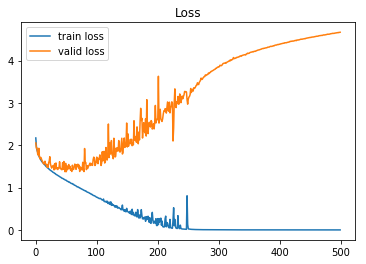

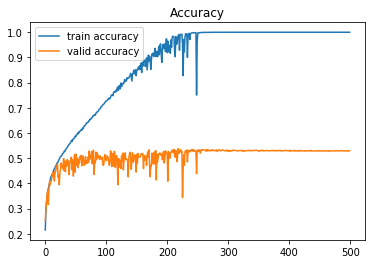

In [16]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()